In [1]:
import pandas as pd

# Task 1: Collect data from two different sources (simulated here as two DataFrames).

# Source 1: Customer info
data_source_1 = {
    'CustomerID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Age': [25, 30, 35, 40]
}
df1 = pd.DataFrame(data_source_1)

# Source 2: Customer transactions
data_source_2 = {
    'CustomerID': [1, 2, 3, 5],
    'TransactionAmount': [100, 200, 150, 300],
    'TransactionDate': ['2023-01-01', '2023-01-03', '2023-01-04', '2023-01-07']
}
df2 = pd.DataFrame(data_source_2)

# Merge the two datasets on 'CustomerID'
merged_df = pd.merge(df1, df2, on='CustomerID', how='outer')

print("Merged DataFrame:\n", merged_df)

# Task 2: Validate data integrity
# - Check for missing values after merge
missing_values = merged_df.isnull().sum()
print("\nMissing values in merged dataset:\n", missing_values)

# - Check for duplicate CustomerIDs
duplicates = merged_df['CustomerID'].duplicated().sum()
print("\nNumber of duplicate CustomerIDs:", duplicates)


Merged DataFrame:
    CustomerID     Name   Age  TransactionAmount TransactionDate
0           1    Alice  25.0              100.0      2023-01-01
1           2      Bob  30.0              200.0      2023-01-03
2           3  Charlie  35.0              150.0      2023-01-04
3           4    David  40.0                NaN             NaN
4           5      NaN   NaN              300.0      2023-01-07

Missing values in merged dataset:
 CustomerID           0
Name                 1
Age                  1
TransactionAmount    1
TransactionDate      1
dtype: int64

Number of duplicate CustomerIDs: 0


In [2]:
import pandas as pd
import numpy as np

# Task 1: Clean a given dataset and document changes

# Sample raw data
data = {
    'ID': [1, 2, 2, 3, 4, 5],
    'Name': ['Alice', 'Bob', 'Bob', None, 'Eve', 'Frank'],
    'Age': ['25', 'thirty', '30', 35, np.nan, 40],
    'Salary': [50000, 60000, 60000, 55000, 52000, -1000],  # Negative salary is outlier
    'JoinDate': ['2020-01-15', '2020-02-20', '2020-02-20', '2019-12-01', 'not_a_date', '2021-05-01']
}
df = pd.DataFrame(data)

print("Original DataFrame:\n", df)

# Step 1: Remove duplicates based on all columns
df = df.drop_duplicates()
print("\nAfter removing duplicates:\n", df)

# Step 2: Handle missing values
# Fill missing 'Name' with 'Unknown'
df['Name'] = df['Name'].fillna('Unknown')
# Fill missing 'Age' with median (after converting valid ages)
# Convert 'Age' to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

print("\nAfter handling missing values and converting 'Age':\n", df)

# Step 3: Correct data types
# Convert 'JoinDate' to datetime, coercing errors to NaT
df['JoinDate'] = pd.to_datetime(df['JoinDate'], errors='coerce')
# Fill NaT with a default date (e.g., earliest date in dataset)
default_date = df['JoinDate'].min()
df['JoinDate'] = df['JoinDate'].fillna(default_date)

print("\nAfter converting 'JoinDate' and filling invalid dates:\n", df)

# Step 4: Handle outliers
# Negative salary is an outlier, set to NaN and then fill with median salary
df.loc[df['Salary'] < 0, 'Salary'] = np.nan
median_salary = df['Salary'].median()
df['Salary'] = df['Salary'].fillna(median_salary)

print("\nAfter handling outliers in 'Salary':\n", df)


# Task 2: Data Cleaning Checklist
cleaning_checklist = [
    "1. Remove duplicate records.",
    "2. Identify and handle missing values appropriately.",
    "3. Convert data types to appropriate formats.",
    "4. Detect and treat outliers.",
    "5. Standardize categorical values and text formatting.",
    "6. Validate date and time fields.",
    "7. Check for consistency across related columns.",
    "8. Document all cleaning steps and rationale."
]

print("\nData Cleaning Checklist:")
for item in cleaning_checklist:
    print(item)


Original DataFrame:
    ID   Name     Age  Salary    JoinDate
0   1  Alice      25   50000  2020-01-15
1   2    Bob  thirty   60000  2020-02-20
2   2    Bob      30   60000  2020-02-20
3   3   None      35   55000  2019-12-01
4   4    Eve     NaN   52000  not_a_date
5   5  Frank      40   -1000  2021-05-01

After removing duplicates:
    ID   Name     Age  Salary    JoinDate
0   1  Alice      25   50000  2020-01-15
1   2    Bob  thirty   60000  2020-02-20
2   2    Bob      30   60000  2020-02-20
3   3   None      35   55000  2019-12-01
4   4    Eve     NaN   52000  not_a_date
5   5  Frank      40   -1000  2021-05-01

After handling missing values and converting 'Age':
    ID     Name   Age  Salary    JoinDate
0   1    Alice  25.0   50000  2020-01-15
1   2      Bob  32.5   60000  2020-02-20
2   2      Bob  30.0   60000  2020-02-20
3   3  Unknown  35.0   55000  2019-12-01
4   4      Eve  32.5   52000  not_a_date
5   5    Frank  40.0   -1000  2021-05-01

After converting 'JoinDate' and fi

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = {
    'CustomerID': [1, 2, 3, 4],
    'PurchaseAmount': [120, 340, 560, 230],
    'PurchaseDate': ['2023-01-15', '2023-03-22', '2022-12-05', '2023-07-10']
}
df = pd.DataFrame(data)

# Task 1: Transform 'PurchaseDate' into 'day', 'month', 'year' columns
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['Day'] = df['PurchaseDate'].dt.day
df['Month'] = df['PurchaseDate'].dt.month
df['Year'] = df['PurchaseDate'].dt.year

print("After splitting 'PurchaseDate':\n", df)

# Task 2: Apply normalization to 'PurchaseAmount'
scaler = MinMaxScaler()
df['NormalizedAmount'] = scaler.fit_transform(df[['PurchaseAmount']])

print("\nAfter normalizing 'PurchaseAmount':\n", df)


After splitting 'PurchaseDate':
    CustomerID  PurchaseAmount PurchaseDate  Day  Month  Year
0           1             120   2023-01-15   15      1  2023
1           2             340   2023-03-22   22      3  2023
2           3             560   2022-12-05    5     12  2022
3           4             230   2023-07-10   10      7  2023

After normalizing 'PurchaseAmount':
    CustomerID  PurchaseAmount PurchaseDate  Day  Month  Year  NormalizedAmount
0           1             120   2023-01-15   15      1  2023              0.00
1           2             340   2023-03-22   22      3  2023              0.50
2           3             560   2022-12-05    5     12  2022              1.00
3           4             230   2023-07-10   10      7  2023              0.25


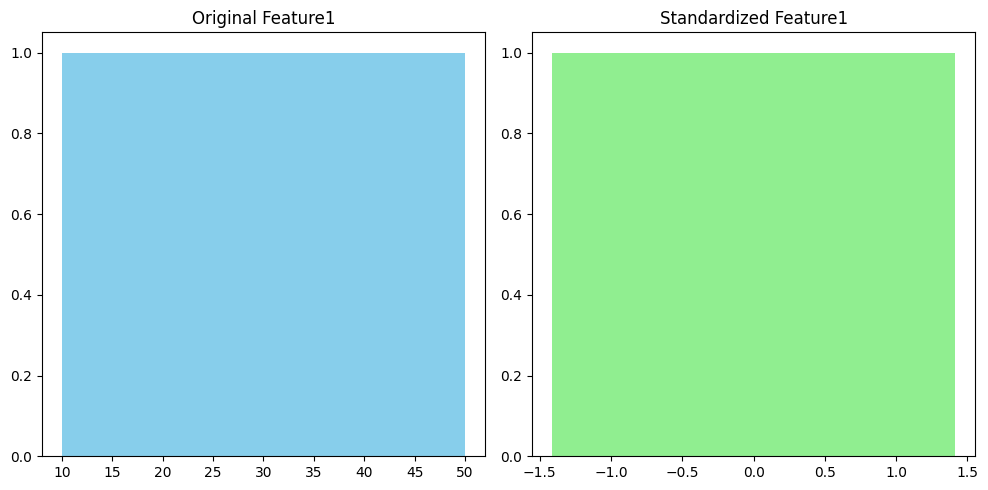

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Sample dataset
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [100, 150, 200, 250, 300]
}
df = pd.DataFrame(data)

# Task 1: Apply Min-Max scaling
min_max_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(min_max_scaler.fit_transform(df), columns=['Feature1', 'Feature2'])

# Task 2: Standardize the dataset
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df), columns=['Feature1', 'Feature2'])

# Visualize original and standardized Feature1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Feature1'], bins=5, color='skyblue')
plt.title('Original Feature1')

plt.subplot(1, 2, 2)
plt.hist(df_standard['Feature1'], bins=5, color='lightgreen')
plt.title('Standardized Feature1')
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Sample dataset
data = {
    'height_cm': [150, 160, 170, 180, 190],
    'weight_kg': [50, 60, 70, 80, 90]
}
df = pd.DataFrame(data)

# Task 1: Create a new synthetic feature - Body Mass Index (BMI)
df['bmi'] = df['weight_kg'] / ((df['height_cm'] / 100) ** 2)

# Target variable (for example purposes)
df['health_score'] = [65, 70, 75, 80, 85]

# Task 2: Evaluate the impact of new features on model accuracy

# Model without BMI
X1 = df[['height_cm', 'weight_kg']]
y = df['health_score']
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.4, random_state=0)
model1 = LinearRegression().fit(X1_train, y_train)
y_pred1 = model1.predict(X1_test)
score1 = r2_score(y_test, y_pred1)

# Model with BMI
X2 = df[['height_cm', 'weight_kg', 'bmi']]
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.4, random_state=0)
model2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = model2.predict(X2_test)
score2 = r2_score(y_test, y_pred2)

print("R2 Score without BMI:", round(score1, 2))
print("R2 Score with BMI:", round(score2, 2))


R2 Score without BMI: 1.0
R2 Score with BMI: 1.0
